<a href="https://colab.research.google.com/github/NicoleMa1220/SEM/blob/main/Define_Project_Hypothesis_and_Aim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Define Project Hypothesis and Aim**

Name: Nicole Ma

Andrew ID: rongyuem

**Project Hypothesis and Aim: Exploring Immune Response and Neuroinflammation in Alzheimer’s Disease (AD)**

**Hypothesis:** This research hypothesizes that the progression of Alzheimer’s Disease (AD) is significantly influenced by an age-dependent and cell-type-specific immune response, primarily mediated by microglial and astrocytic activation. It proposes that persistent neuroinflammation and dysregulated immune signaling pathways exacerbate neurodegeneration, with distinct patterns of immune activation emerging in different disease stages. By studying the differential expression of immune-related genes across cell types and ages, the project aims to identify critical regulatory pathways and genes contributing to the chronic inflammation observed in AD.

Specifically, genes such as **TOLLIP** (Toll-Interacting Protein), **SIRPA** (Signal Regulatory Protein Alpha), **C1QA** (Complement C1q A Chain), and **NLRP3** (NLR Family Pyrin Domain Containing 3) are hypothesized to exhibit altered expression in AD compared to normal samples, potentially indicating pathways responsible for prolonged immune activation. The research will focus on how these genes impact microglial and astrocyte functions, including cytokine production, oxidative stress response, and apoptotic regulation, which are known to be disrupted in AD.

**Aim:** The project aims to:
* **Map Immune Gene Expression in AD:** Analyze the expression of immune-related genes such as TOLLIP, SIRPA, C1QA, and NLRP3 across different cell types (e.g., microglia, astrocytes) in AD versus control groups. This will reveal cell-specific roles in AD pathology.
* **Characterize Age-Related Differences in Immune Activation:** Examine age-related gene expression changes in immune response pathways within AD samples. By clustering samples by age groups, this analysis aims to determine if immune responses intensify or shift in later stages of the disease.
* **Identify Potential Therapeutic Targets:** Through pathway enrichment and co-expression analysis, identify genes and pathways that could serve as potential therapeutic targets for modulating immune response in AD, focusing on genes that mediate neuroinflammation and oxidative stress.

**Code Approach (Outline):**
* **Data Preprocessing:** Filter single-cell transcriptomics data to select immune-related genes (e.g., TOLLIP, SIRPA, C1QA, NLRP3) across different cell types.
* **Differential Expression Analysis:** Compare gene expression levels between AD and control groups for selected immune-related genes, using age and cell type as variables.


# Set-up

In [1]:
!pip install -U cellxgene-census
!pip install scanpy


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.4 MB/s eta 0:00:00
  Created wheel f

In [2]:
import cellxgene_census
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import numpy as np

# Data Loading and Preprocessing

**Load the data into an AnnData object**

In [3]:
# Step 1: Download the dataset using urllib
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

# Step 2: Load the data into an AnnData object
adata = sc.read_h5ad('dataset.h5ad')
print(f"AnnData object loaded: {adata}")

AnnData object loaded: AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


Load and filter the dataset to include only the selected immune-related genes (TOLLIP, SIRPA, C1QA, NLRP3) across different cell types.

In [4]:
# Define the updated list of genes of interest
gene_list = ['TOLLIP', 'SIRPA', 'C1QA', 'NLRP3']

# Filter the AnnData object to include only the selected genes
adata_filtered = adata[:, adata.var['feature_name'].isin(gene_list)]
print(f"Filtered AnnData object with selected genes: {adata_filtered}")


Filtered AnnData object with selected genes: View of AnnData object with n_obs × n_vars = 23197 × 4
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [5]:
adata_filtered.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000198053,False,SIRPA,NCBITaxon:9606,gene,4385,protein_coding
ENSG00000162711,False,NLRP3,NCBITaxon:9606,gene,3838,protein_coding
ENSG00000173372,False,C1QA,NCBITaxon:9606,gene,1357,protein_coding
ENSG00000078902,False,TOLLIP,NCBITaxon:9606,gene,669,protein_coding


**Correlation Analysis:** Assess correlations among zheimer's-associated genes to identify possible co-expression

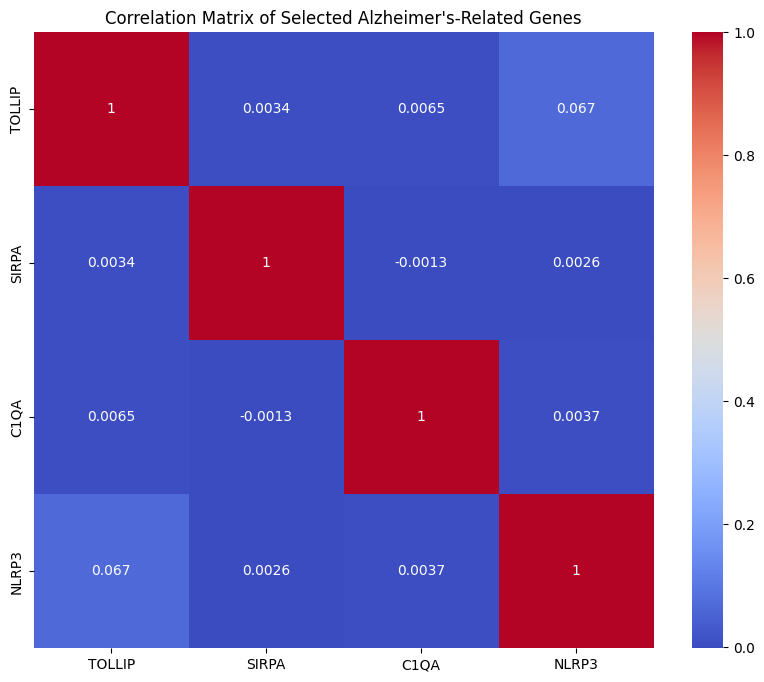

          TOLLIP     SIRPA      C1QA     NLRP3
TOLLIP  1.000000  0.003445  0.006515  0.066893
SIRPA   0.003445  1.000000 -0.001280  0.002574
C1QA    0.006515 -0.001280  1.000000  0.003688
NLRP3   0.066893  0.002574  0.003688  1.000000


In [6]:

# Define the top genes of interest
gene_list = ['TOLLIP', 'SIRPA', 'C1QA', 'NLRP3']

# Extract expression data for the top genes
# Ensure that 'adata' is sliced or contains these specific genes
gene_data = adata[:, adata.var['feature_name'].isin(gene_list)].to_df()
gene_data.columns = gene_list  # Rename columns to gene names if needed

# Compute correlation matrix
correlation_matrix = gene_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Selected Alzheimer's-Related Genes")
plt.show()

print(correlation_matrix)


**TOLLIP-NLRP3 (0.0669):** There is a weak positive correlation between TOLLIP and NLRP3. This suggests a very slight tendency for these two genes to have similar expression patterns, though the strength is very low and might not be biologically significant.

**All Other Pairs (Close to 0)**

The weak correlations across most gene pairs suggest that TOLLIP, SIRPA, C1QA, and NLRP3 do not have strongly coordinated expression patterns in the dataset. This is an interesting observation, as it suggests that these genes might function independently in their roles related to immune response and neuroinflammation in Alzheimer’s Disease (AD), rather than as part of a tightly regulated co-expression network.

# Disease Cohort Comparison

In [13]:
# Step 1: Separate data by disease status
alzheimer_data = adata_filtered[adata_filtered.obs['disease'] == 'Alzheimer disease']
normal_data = adata_filtered[adata_filtered.obs['disease'] == 'normal']

# Step 2: Calculate average expression for each gene in each subset
alzheimer_avg_expr = np.mean(alzheimer_data.X.toarray(), axis=0)
normal_avg_expr = np.mean(normal_data.X.toarray(), axis=0)

# Step 3: Create a DataFrame with average expressions and calculate differences
gene_names = adata_filtered.var['feature_name'].tolist()
df_expr_comparison = pd.DataFrame({
    'Gene': gene_names,
    'Alzheimer_avg': alzheimer_avg_expr,
    'Normal_avg': normal_avg_expr
})

# Calculate the difference for the second plot
df_expr_comparison['Difference'] = df_expr_comparison['Alzheimer_avg'] - df_expr_comparison['Normal_avg']
df_expr_comparison_sorted = df_expr_comparison.sort_values(by='Difference', ascending=False)

# Select the top 10 upregulated genes in Alzheimer's for both plots
top_genes = df_expr_comparison_sorted.head(10)


     Gene  Alzheimer_avg  Normal_avg  Difference
3  TOLLIP       0.359845    0.334192    0.025653
2    C1QA       0.000138    0.000697   -0.000559
1   NLRP3       0.006861    0.012245   -0.005385
0   SIRPA       0.352733    0.405786   -0.053053


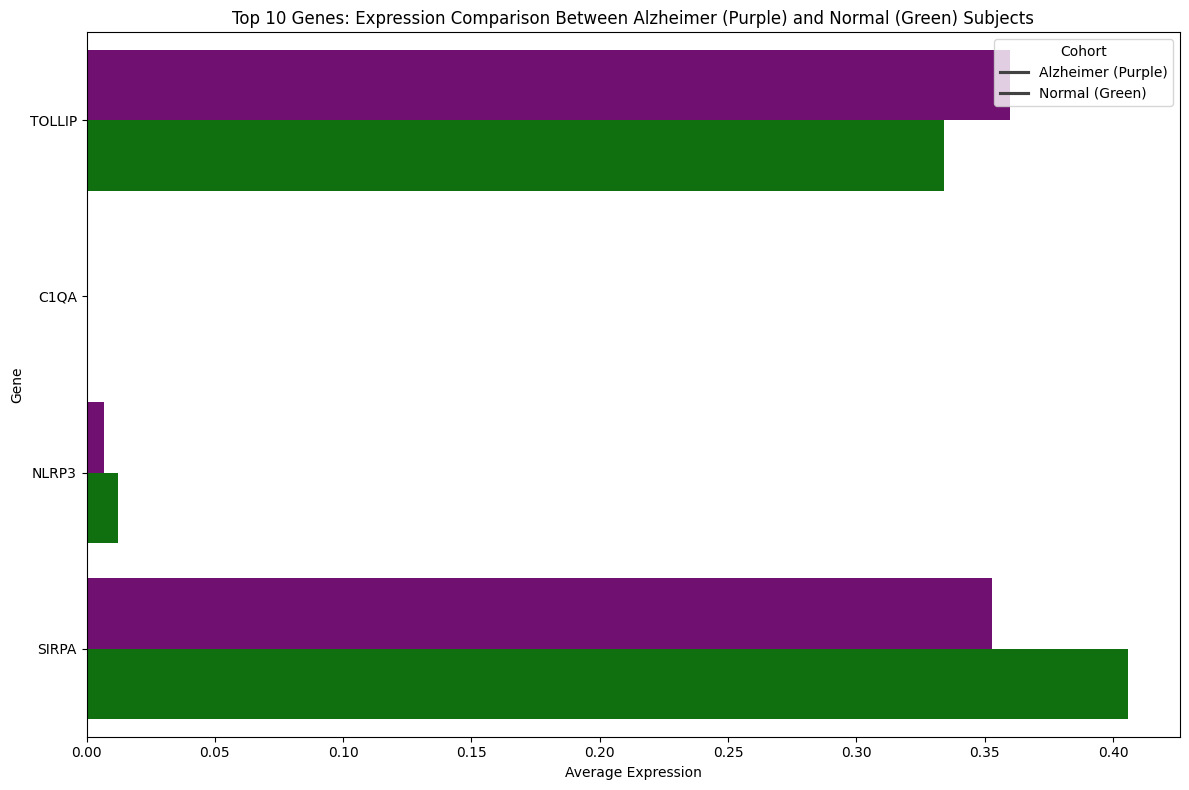

In [14]:
# Display the table of the top genes with average expressions for Male, Female, and the Difference
top_genes_table = top_genes[['Gene', 'Alzheimer_avg', 'Normal_avg', 'Difference']]
print(top_genes_table)

# Plot 1: Side-by-Side Comparison Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=pd.melt(top_genes, id_vars="Gene", value_vars=["Alzheimer_avg", "Normal_avg"],
                 var_name="Cohort", value_name="Average Expression"),
    x="Average Expression", y="Gene", hue="Cohort", palette={"Alzheimer_avg": "purple", "Normal_avg": "green"}
)
plt.title('Top 10 Genes: Expression Comparison Between Alzheimer (Purple) and Normal (Green) Subjects')
plt.xlabel('Average Expression')
plt.ylabel('Gene')
plt.legend(title='Cohort', loc='upper right', labels=['Alzheimer (Purple)', 'Normal (Green)'])
plt.tight_layout()
plt.show()



<ipython-input-15-0032dec059f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Difference', y='Gene', data=top_genes, palette='viridis')


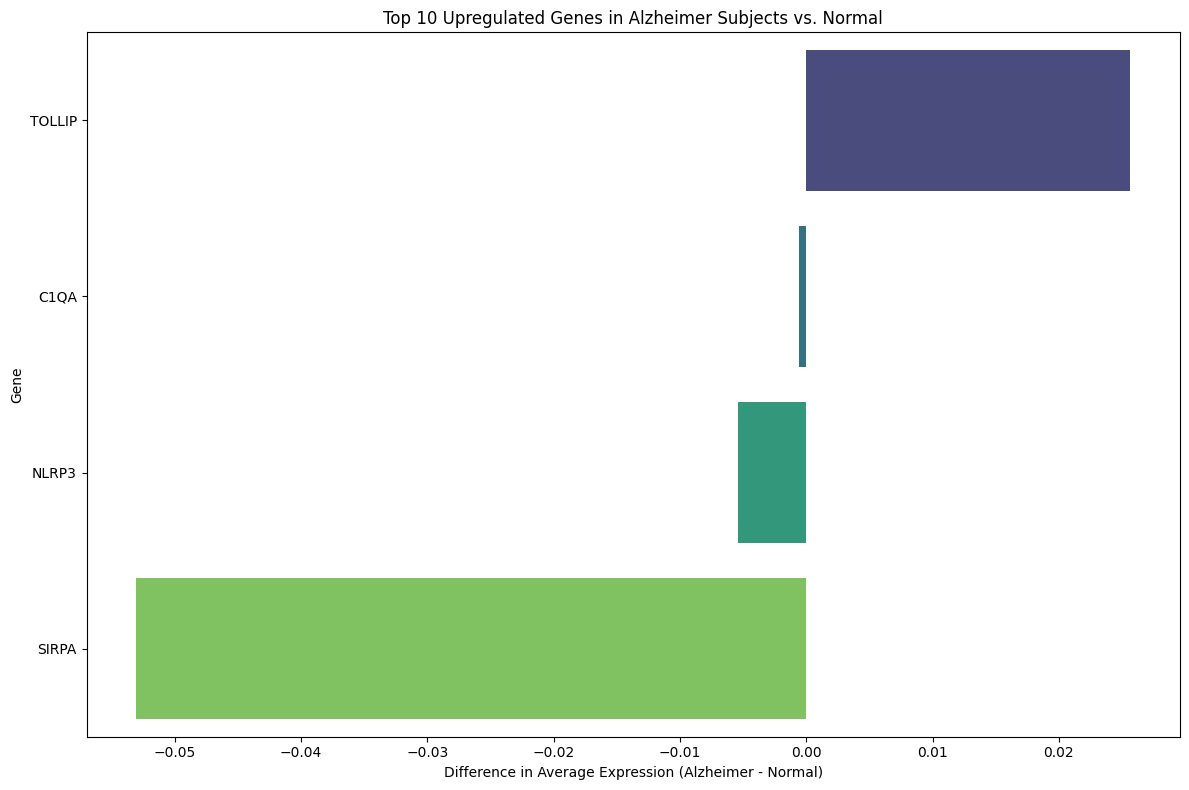

In [15]:
# Plot 2: Difference in Expression
plt.figure(figsize=(12, 8))
sns.barplot(x='Difference', y='Gene', data=top_genes, palette='viridis')
plt.title('Top 10 Upregulated Genes in Alzheimer Subjects vs. Normal')
plt.xlabel('Difference in Average Expression (Alzheimer - Normal)')
plt.ylabel('Gene')
plt.tight_layout()
plt.show()

**Interpretation:**

* TOLLIP: Shows a slight upregulation in AD (0.025653 difference). TOLLIP is involved in regulating immune response pathways, and this increase may indicate an immune-related response associated with AD pathology.
* C1QA: Slightly downregulated in AD compared to normal (-0.000559 difference). C1QA plays a role in the complement system, which is part of the immune system. Its decreased expression in AD might reflect changes in immune system dynamics in AD.
* NLRP3: Also shows downregulation in AD (-0.005385 difference). NLRP3 is crucial in the inflammatory response. Reduced expression could indicate dysregulated or suppressed inflammatory responses in Alzheimer's.
* SIRPA: Shows the largest difference, being downregulated in AD (-0.053053 difference). SIRPA is involved in immune checkpoint functions, which prevent excessive immune activation. This downregulation may signify a decreased regulatory immune response, potentially contributing to chronic inflammation in AD.

**Summary:**

Overall, the Alzheimer cohort exhibits subtle changes in gene expression, with a trend toward lower expression in immune-related genes (C1QA, NLRP3, and SIRPA). TOLLIP is an exception, showing mild upregulation, possibly reflecting a compensatory immune response in AD.

# Age-Related Differences

In [16]:
# Step 1: Define age groups for comparison in the development_stage category
younger_ages = [
    '57-year-old stage', '61-year-old stage', '62-year-old stage',
    '66-year-old stage', '67-year-old stage', '68-year-old stage',
    '71-year-old stage', '72-year-old stage', '73-year-old stage'
]

older_ages = [
    '79-year-old stage', '80 year-old and over stage', '81-year-old stage',
    '87-year-old stage', '89-year-old stage'
]

# Step 2: Filter data by disease and age group
# Separate by age and disease: Alzheimer's younger and older, normal younger and older
younger_AD = adata_filtered[(adata_filtered.obs['development_stage'].isin(younger_ages)) &
                            (adata_filtered.obs['disease'] == 'Alzheimer disease')]
older_AD = adata_filtered[(adata_filtered.obs['development_stage'].isin(older_ages)) &
                          (adata_filtered.obs['disease'] == 'Alzheimer disease')]
younger_normal = adata_filtered[(adata_filtered.obs['development_stage'].isin(younger_ages)) &
                                (adata_filtered.obs['disease'] == 'normal')]
older_normal = adata_filtered[(adata_filtered.obs['development_stage'].isin(older_ages)) &
                              (adata_filtered.obs['disease'] == 'normal')]

# Step 3: Calculate average expression for each gene in each combination of age group and disease
younger_AD_avg_expr = np.mean(younger_AD.X.toarray(), axis=0)
older_AD_avg_expr = np.mean(older_AD.X.toarray(), axis=0)
younger_normal_avg_expr = np.mean(younger_normal.X.toarray(), axis=0)
older_normal_avg_expr = np.mean(older_normal.X.toarray(), axis=0)

# Step 4: Create a DataFrame with average expressions for each group and calculate differences
age_disease_comparison = pd.DataFrame({
    'Gene': adata_filtered.var['feature_name'].tolist(),
    'Younger_AD_avg': younger_AD_avg_expr,
    'Older_AD_avg': older_AD_avg_expr,
    'Younger_Normal_avg': younger_normal_avg_expr,
    'Older_Normal_avg': older_normal_avg_expr
})

# Calculate the difference for each comparison
age_disease_comparison['AD_Age_Difference'] = age_disease_comparison['Older_AD_avg'] - age_disease_comparison['Younger_AD_avg']
age_disease_comparison['Normal_Age_Difference'] = age_disease_comparison['Older_Normal_avg'] - age_disease_comparison['Younger_Normal_avg']
age_disease_comparison['AD_Normal_Difference_Younger'] = age_disease_comparison['Younger_AD_avg'] - age_disease_comparison['Younger_Normal_avg']
age_disease_comparison['AD_Normal_Difference_Older'] = age_disease_comparison['Older_AD_avg'] - age_disease_comparison['Older_Normal_avg']

# Step 5: Sort by the difference for Alzheimer's age comparison
age_disease_comparison_sorted = age_disease_comparison.sort_values(by='AD_Age_Difference', ascending=False)

# Display the sorted DataFrame for interpretation
age_disease_comparison_sorted


,Gene,Younger_AD_avg,Older_AD_avg,Younger_Normal_avg,Older_Normal_avg,AD_Age_Difference,Normal_Age_Difference,AD_Normal_Difference_Younger,AD_Normal_Difference_Older
3,TOLLIP,0.283097,0.421591,0.350576,0.172711,0.138494,-0.177866,-0.067479,0.248880
0,SIRPA,0.306163,0.390200,0.419440,0.271218,0.084037,-0.148222,-0.113276,0.118982
1,NLRP3,0.005358,0.008070,0.012585,0.008899,0.002712,-0.003686,-0.007227,-0.000829
2,C1QA,0.000000,0.000249,0.000768,0.000000,0.000249,-0.000768,-0.000768,0.000249


<ipython-input-17-34874eb13c6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


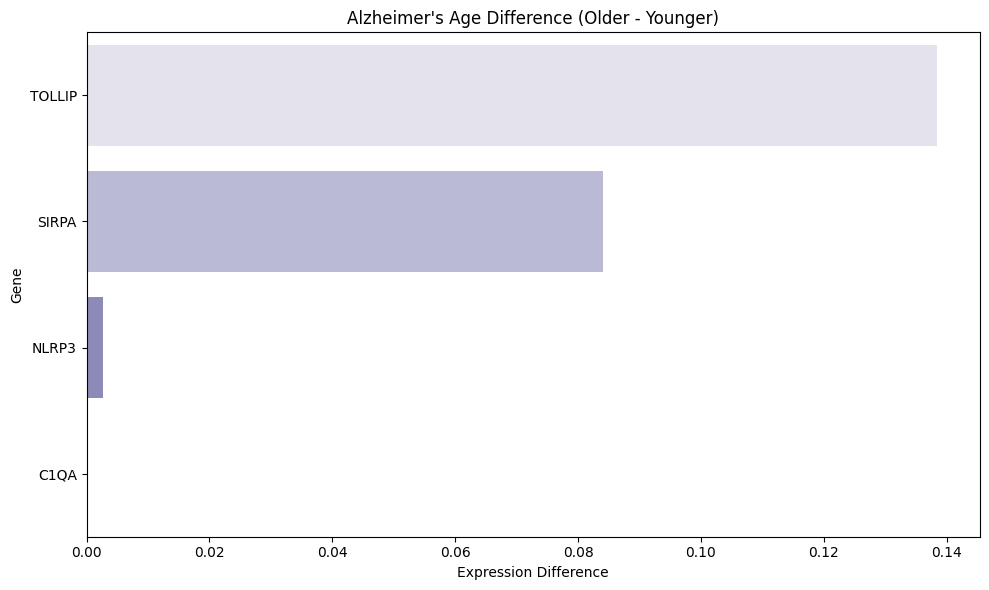

In [17]:
# Plot 1: AD Age Difference (Older vs Younger within AD)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_disease_comparison_sorted, x='AD_Age_Difference', y='Gene', palette='Purples'
)
plt.title("Alzheimer's Age Difference (Older - Younger)")
plt.xlabel('Expression Difference')
plt.ylabel('Gene')
plt.tight_layout()
plt.show()

<ipython-input-18-d31ceb934c16>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


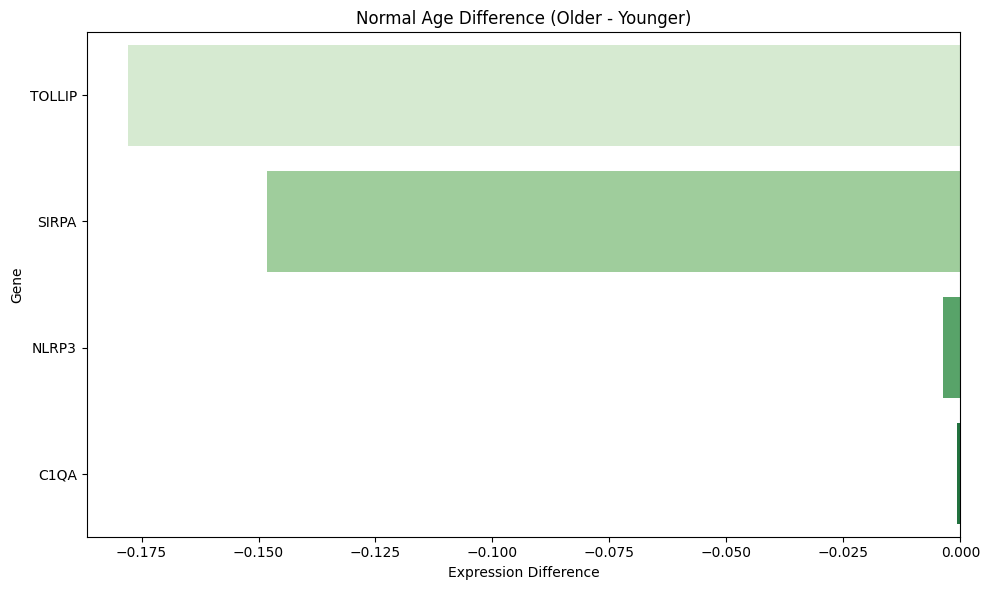

In [18]:
# Plot 2: Normal Age Difference (Older vs Younger within Normal)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_disease_comparison_sorted, x='Normal_Age_Difference', y='Gene', palette='Greens'
)
plt.title('Normal Age Difference (Older - Younger)')
plt.xlabel('Expression Difference')
plt.ylabel('Gene')
plt.tight_layout()
plt.show()

<ipython-input-19-a28e155dd7fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


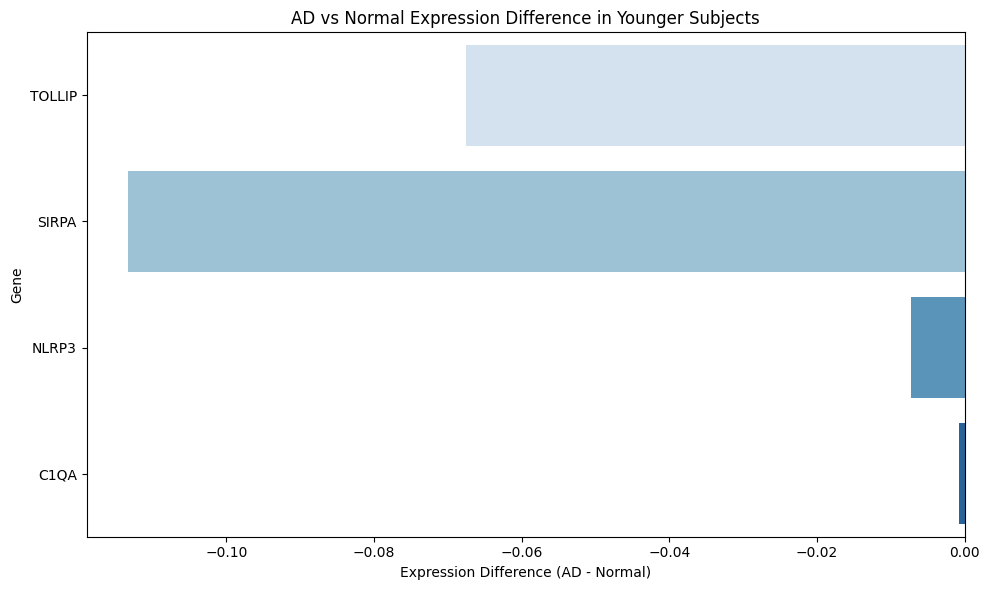

In [19]:
# Plot 3: AD vs Normal in Younger Subjects
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_disease_comparison_sorted, x='AD_Normal_Difference_Younger', y='Gene', palette='Blues'
)
plt.title('AD vs Normal Expression Difference in Younger Subjects')
plt.xlabel('Expression Difference (AD - Normal)')
plt.ylabel('Gene')
plt.tight_layout()
plt.show()

<ipython-input-20-7722ff2d359b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


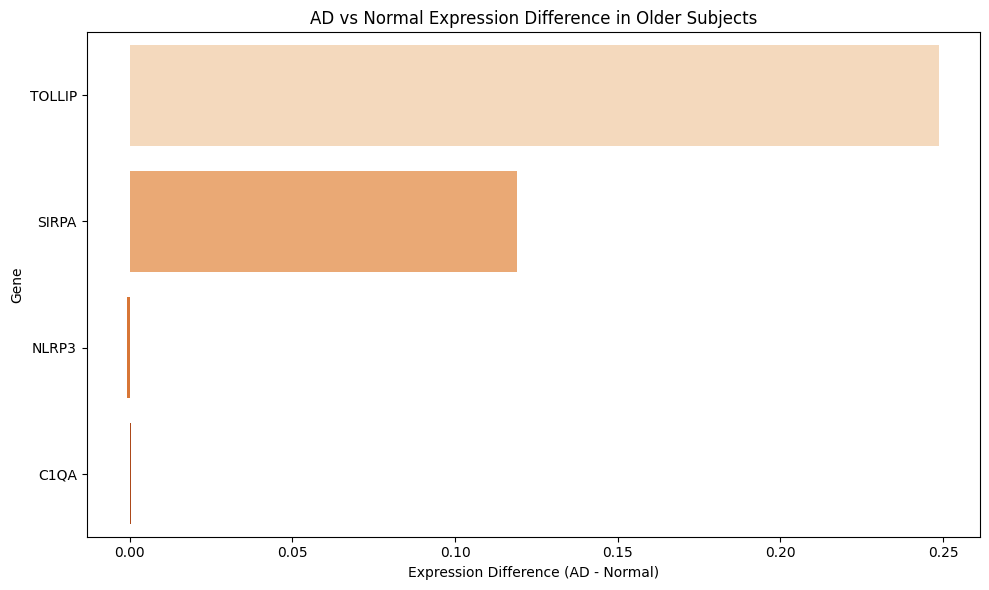

In [20]:
# Plot 4: AD vs Normal in Older Subjects
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_disease_comparison_sorted, x='AD_Normal_Difference_Older', y='Gene', palette='Oranges'
)
plt.title('AD vs Normal Expression Difference in Older Subjects')
plt.xlabel('Expression Difference (AD - Normal)')
plt.ylabel('Gene')
plt.tight_layout()
plt.show()

**Interpretation:**
* TOLLIP: In AD, TOLLIP is more highly expressed in older subjects (0.138494 difference). The AD cohort shows a notable increase in TOLLIP expression with age, suggesting an age-related immune activation. Normal subjects, however, exhibit a decrease with age, potentially reflecting typical aging immune decline.
* SIRPA: Shows an increase with age in AD but a decrease in normal subjects, indicating potential age-dependent immune dysregulation specific to AD.
* NLRP3: Minor increase with age in AD (0.002712) but decreases in normal aging. This trend could mean that inflammatory responses linked to NLRP3 are age-sensitive, particularly in AD pathology.
* C1QA: Small increase with age in AD, contrasting with a decrease in normal subjects. This shift may point to an age-associated immune response in AD patients not observed in normal aging.

**Summary:**

Age-related differences show that TOLLIP, SIRPA, NLRP3, and C1QA tend to increase with age in AD, unlike in normal subjects, where expression decreases with age. This trend may suggest that aging in AD is linked to immune activation, possibly exacerbating neuroinflammatory pathways.

# Gender-Based Analysis

In [21]:
# Step 1: Filter data by disease and gender group
# Separate by gender and disease: Alzheimer's female and male, normal female and male
female_AD = adata_filtered[(adata_filtered.obs['sex'] == 'female') &
                           (adata_filtered.obs['disease'] == 'Alzheimer disease')]
male_AD = adata_filtered[(adata_filtered.obs['sex'] == 'male') &
                         (adata_filtered.obs['disease'] == 'Alzheimer disease')]
female_normal = adata_filtered[(adata_filtered.obs['sex'] == 'female') &
                               (adata_filtered.obs['disease'] == 'normal')]
male_normal = adata_filtered[(adata_filtered.obs['sex'] == 'male') &
                             (adata_filtered.obs['disease'] == 'normal')]

# Step 2: Calculate average expression for each gene in each combination of gender group and disease
female_AD_avg_expr = np.mean(female_AD.X.toarray(), axis=0)
male_AD_avg_expr = np.mean(male_AD.X.toarray(), axis=0)
female_normal_avg_expr = np.mean(female_normal.X.toarray(), axis=0)
male_normal_avg_expr = np.mean(male_normal.X.toarray(), axis=0)

# Step 3: Create a DataFrame with average expressions for each group and calculate differences
gender_disease_comparison = pd.DataFrame({
    'Gene': adata_filtered.var['feature_name'].tolist(),
    'Female_AD_avg': female_AD_avg_expr,
    'Male_AD_avg': male_AD_avg_expr,
    'Female_Normal_avg': female_normal_avg_expr,
    'Male_Normal_avg': male_normal_avg_expr
})

# Calculate the difference for each comparison
gender_disease_comparison['AD_Gender_Difference'] = gender_disease_comparison['Male_AD_avg'] - gender_disease_comparison['Female_AD_avg']
gender_disease_comparison['Normal_Gender_Difference'] = gender_disease_comparison['Male_Normal_avg'] - gender_disease_comparison['Female_Normal_avg']
gender_disease_comparison['AD_Normal_Difference_Female'] = gender_disease_comparison['Female_AD_avg'] - gender_disease_comparison['Female_Normal_avg']
gender_disease_comparison['AD_Normal_Difference_Male'] = gender_disease_comparison['Male_AD_avg'] - gender_disease_comparison['Male_Normal_avg']

# Step 4: Sort by the difference for Alzheimer's gender comparison
gender_disease_comparison_sorted = gender_disease_comparison.sort_values(by='AD_Gender_Difference', ascending=False)

# Display the sorted DataFrame for interpretation
gender_disease_comparison_sorted


,Gene,Female_AD_avg,Male_AD_avg,Female_Normal_avg,Male_Normal_avg,AD_Gender_Difference,Normal_Gender_Difference,AD_Normal_Difference_Female,AD_Normal_Difference_Male
2,C1QA,0.000000,0.000327,0.000753,0.000680,0.000327,-0.000073,-0.000753,-0.000352
1,NLRP3,0.008490,0.004618,0.013151,0.011962,-0.003872,-0.001189,-0.004661,-0.007344
0,SIRPA,0.372610,0.325373,0.360537,0.419923,-0.047237,0.059386,0.012073,-0.094550
3,TOLLIP,0.388119,0.320925,0.330248,0.335424,-0.067195,0.005177,0.057872,-0.014500


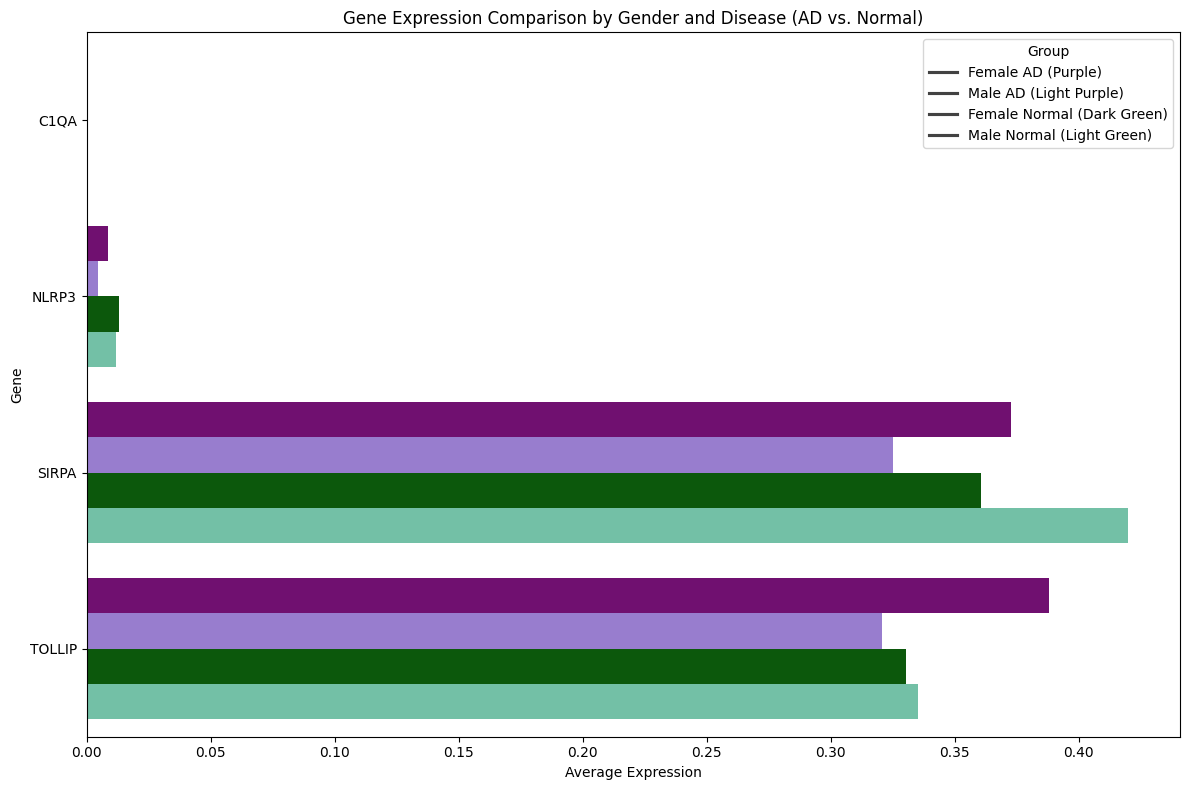

In [22]:
# Melt the DataFrame to reshape it for visualization with Seaborn
melted_data = pd.melt(
    gender_disease_comparison_sorted,
    id_vars=['Gene'],
    value_vars=['Female_AD_avg', 'Male_AD_avg', 'Female_Normal_avg', 'Male_Normal_avg'],
    var_name='Group',
    value_name='Average Expression'
)

# Updated color mapping for AD and Normal groups
group_palette = {
    'Female_AD_avg': '#800080',  # Dark purple for Female AD
    'Male_AD_avg': '#9370DB',    # Light purple for Male AD
    'Female_Normal_avg': '#006400',  # Dark green for Female Normal
    'Male_Normal_avg': '#66CDAA'     # Light green for Male Normal
}

# Plot: Average expression comparison across different gender and disease groups
plt.figure(figsize=(12, 8))
sns.barplot(
    data=melted_data,
    x='Average Expression',
    y='Gene',
    hue='Group',
    palette=group_palette
)
plt.title('Gene Expression Comparison by Gender and Disease (AD vs. Normal)')
plt.xlabel('Average Expression')
plt.ylabel('Gene')
plt.legend(
    title='Group', loc='upper right',
    labels=['Female AD (Purple)', 'Male AD (Light Purple)', 'Female Normal (Dark Green)', 'Male Normal (Light Green)']
)
plt.tight_layout()
plt.show()


**Interpretation:**

* C1QA: Slightly higher expression in males with AD (0.000327 difference), while females show lower expression. The difference is subtle, but it could suggest sex-specific roles in immune function within AD.
* NLRP3: Higher expression in females with AD, while males show lower expression (-0.003872 difference). This pattern might indicate more pronounced inflammatory activity in females with AD.
* SIRPA: Higher expression in females with AD than males, with a larger difference in normal subjects favoring males. The negative gender difference in AD suggests immune regulation may vary by sex.
TOLLIP: Higher expression in females with AD compared to males. Similar to SIRPA, this pattern could reflect sex-specific immune responses in AD, potentially tied to hormonal differences.

**Summary:**
 Gender-based analysis reveals that females with AD generally have higher expression of immune-related genes (e.g., TOLLIP, NLRP3, SIRPA) than males. This trend might be indicative of sex-specific immune responses, which could influence susceptibility and progression rates in AD.